# Plots for T3100

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
matplotlib.font_manager._rebuild()
sb.set(
    context="paper",
    style="white",
    palette=['#B01316', '#A3A3A3', '#3F3F3F', '#EC6565'],
    font="serif",
    font_scale=1.6,
    rc={'lines.linewidth': 1.2, 'font.serif': 'Latin Modern Roman'}
)

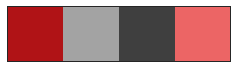

In [2]:
sb.palplot(sb.color_palette())

In [3]:
def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate

In [4]:
def format_and_save(name):
    sb.despine()
    
    ax = plt.gca()
    ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    
    plt.grid(b=True, which='major', linewidth=1.0)
    plt.grid(b=True, which='minor', linewidth=0.5, linestyle='-.')
    
    plt.tight_layout(0.1)
    
    plt.savefig(f'images/plot_{name}.pdf')

## Outlier Types

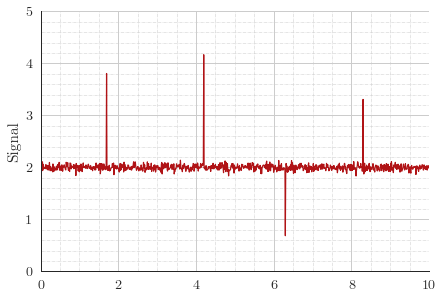

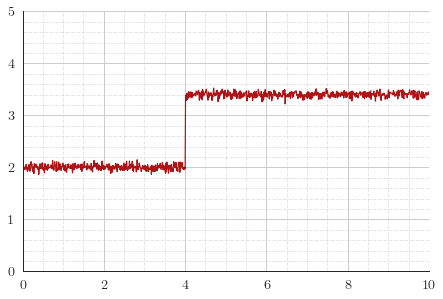

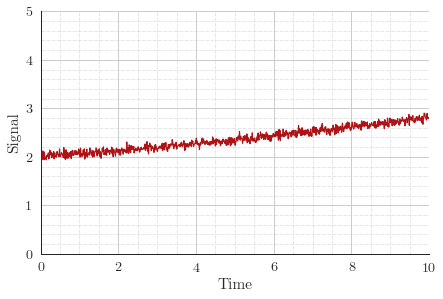

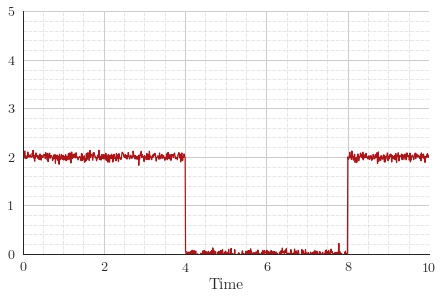

In [24]:
@static_vars(i=0)
def plot_outlier_types(f, name):
    plot_outlier_types.i += 1
    
    plt.figure(figsize=[6, 4])
    x = np.arange(0, 10, 0.01)
    y = 2 + 0.05*np.random.randn(len(x), 1).squeeze() +  + np.array([f(_x) for _x in x])

    plt.plot(x, y)
    plt.xlim([0, 10])
    plt.ylim([0, 5])
    
    if plot_outlier_types.i >= 3:
        plt.xlabel('Time')
    if plot_outlier_types.i % 2 == 1:
        plt.ylabel('Signal')
        
    format_and_save(f'outlier_{name}')

def spike(x):
    if x == 1.7:
        return 1.8
    elif x == 4.2:
        return 2.1
    elif x == 6.3:
        return -1.4
    elif x == 8.3:
        return 1.3
    else:
        return 0
plot_outlier_types(spike, 'spike')

plot_outlier_types(lambda x: 1.4 if x > 4 else 0, 'levelshift')

def drift(x):
    x_start = 0
    if x < x_start:
        return 0
    else:
        return np.exp(0.06*(x - x_start))-1
plot_outlier_types(drift, 'drift')

plot_outlier_types(lambda x: -2 if x > 4 and x < 8 else 0, 'null')


## Velocity Measurements

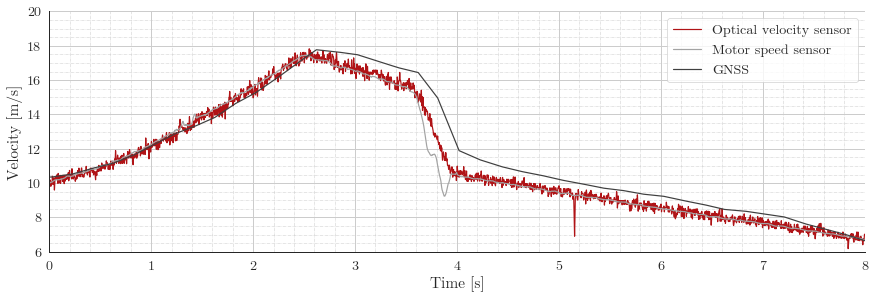

In [8]:
def plot_velocities():
    plt.figure(figsize=[12, 4])
    
    file = 'data/velocities_PoST_2019-10-03_RUN002.csv'
    data = pd.read_csv(file, names=['time', 'SFII', 'GPS', 'Wheels'])
    data['time'] -= data['time'][0]+124
    plt.plot(data['time'], data["SFII"], label='Optical velocity sensor')
    plt.plot(data['time'], data["Wheels"], label='Motor speed sensor')
    plt.plot(data['time'], data["GPS"], label='GNSS')
    plt.legend()
    
    plt.xlim([0, 8])
    plt.ylim([6, 20])
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    
    format_and_save('velocities')
    
plot_velocities()

c:\users\domis\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\domis\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


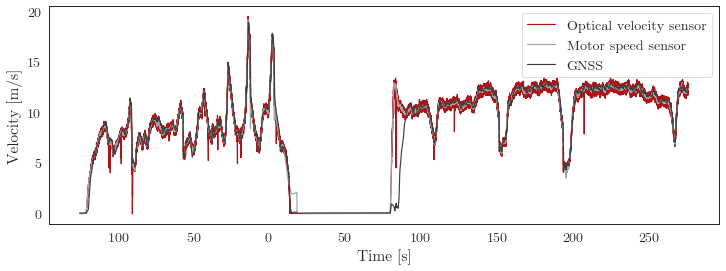

In [14]:
def plot_velocities_full():
    plt.figure(figsize=[12, 4])
    
    file = 'data/velocities_PoST_2019-10-03_RUN002.csv'
    data = pd.read_csv(file, names=['time', 'SFII', 'GPS', 'Wheels'])
    data['time'] -= data['time'][0]+124
    plt.plot(data['time'], data["SFII"], label='Optical velocity sensor')
    plt.plot(data['time'], data["Wheels"], label='Motor speed sensor')
    plt.plot(data['time'], data["GPS"], label='GNSS')
    plt.legend()
    
#     plt.xlim([0, 8])
#     plt.ylim([6, 20])
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    
plot_velocities_full()